In [3]:
import numpy as np
import sys
import re
import os
import cygnus_lib as cy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line, resize, rescale)
import scipy.ndimage
from skimage.transform import hough_circle, hough_circle_peaks
from scipy.stats import norm
import scipy.stats as stats


import mylib as my

%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
plt.rcParams['font.serif'] = ['Bitstream Vera Sans']

from itertools import combinations

# crea il piedistallo dai run
il programma e' gia' pronto per i file della nuova telecamra con il la risuluzione maggiore. Oltre a sostiture la risoluzione controllare che il formato dei file sia lo stesso che in precedenza. Il programma crea il file H5 imagine delle medie di ogni punto e delle sigma: runXXX_mean.h5, runXXX_sigma.h5

In [4]:
#######
x_resolution = y_resolution = 2048
######## H5 nuova telecamera
# x_resolution = y_resolution = 2304
# dataSelection = 'TES'
# 
dataSelection = 'BTF'
runI = [58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 76, 77]
runI = [103, 104, 105, 106, 107, 108, 109, 110, 111, 112]
runI = [43, 44, 45, 46, 47, 48 , 49, 50, 51, 52, 53, 112]
runI = [84, 85, 86, 87, 88, 89, 90, 91, 130, 131, 132, 133, 134, 135, 136, 137]
start_image_to_read = 0
max_image_to_read = 0
for nRi in range(0,len(runI)):
#############  mean and sigma file generator ############################
    try:
        nImag=np.size(cy.swift_listdir(cy.file2FullPathCygnus(dataSelection, runI[nRi],'H5')))
        
        print ("# of Image Files: %d" % (nImag))
    
    except:
        print ("ERROR: No file %d" % (runI[nRi]))
        break
    if max_image_to_read != 0:
        nImag = max_image_to_read   
    print ("WARNING: data will be anlyzed from %d to %d" % (start_image_to_read, nImag))
    
    m_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)
    s_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)

    n0 = 0
    for iImg in range(start_image_to_read, nImag):
        #
        # attenzione patch messa per i file dei 'TES" i test della telecamera nuova
        # fii = cy.imageFile2FullPathCygnus(dataSelection, runI[nRi], iImg)
        # filepach = fii[0:35]+'_'+fii[35:] 
        # print (filepach)
        # image = cy.swift_read_image_h5(filepach)
        #
        image = cy.swift_read_image_h5(cy.imageFile2FullPathCygnus(dataSelection, runI[nRi], iImg))
        #
        m_image += image
        s_image += image**2 
        if n0 > 0:  # print progress and debung info for poit 200, 200...
            print ("Image[200,200]: %d => %.2f %.2f %.2f " % (iImg,
                                             image[200,200],
                                             np.sqrt((s_image[200,200] - 
                                                     m_image[200,200]**2 
                                                      / (n0+1)) / n0),
                                             m_image[200,200]/(n0+1),
                                             ))
        n0 += 1
    m_image = m_image/n0
    s_image = np.sqrt((s_image - m_image**2 * n0) / (n0 - 1))
    
###### print Info and Save OutPut ######################################
    
    print ("sigma %f" % (s_image[200,200]))
    fileoutm = ("./data/run%d_mean.h5" % (runI[nRi]))
    cy.write_image_h5(fileoutm, m_image)
    fileouts = ("./data/run%d_sigma.h5" % (runI[nRi]))
    cy.write_image_h5(fileouts, s_image)
    print("DONE OUTPUT on files: %s, %s", (fileoutm, fileouts))

# of Image Files: 100
Image[200,200]: 1 => 104.00 4.95 107.50 
Image[200,200]: 2 => 106.00 3.61 107.00 
Image[200,200]: 3 => 103.00 3.56 106.00 
Image[200,200]: 4 => 101.00 3.81 105.00 
Image[200,200]: 5 => 97.00 4.72 103.67 
Image[200,200]: 6 => 100.00 4.53 103.14 
Image[200,200]: 7 => 106.00 4.31 103.50 
Image[200,200]: 8 => 100.00 4.20 103.11 
Image[200,200]: 9 => 103.00 3.96 103.10 
Image[200,200]: 10 => 101.00 3.81 102.91 
Image[200,200]: 11 => 106.00 3.74 103.17 
Image[200,200]: 12 => 104.00 3.59 103.23 
Image[200,200]: 13 => 104.00 3.45 103.29 
Image[200,200]: 14 => 107.00 3.46 103.53 
Image[200,200]: 15 => 103.00 3.35 103.50 
Image[200,200]: 16 => 104.00 3.24 103.53 
Image[200,200]: 17 => 102.00 3.17 103.44 
Image[200,200]: 18 => 108.00 3.25 103.68 
Image[200,200]: 19 => 103.00 3.17 103.65 
Image[200,200]: 20 => 102.00 3.11 103.57 
Image[200,200]: 21 => 102.00 3.05 103.50 
Image[200,200]: 22 => 102.00 3.00 103.43 
Image[200,200]: 23 => 104.00 2.93 103.46 
Image[200,200]: 24 => 

Image[200,200]: 93 => 102.00 2.13 102.80 
Image[200,200]: 94 => 101.00 2.13 102.78 
Image[200,200]: 95 => 108.00 2.18 102.83 
Image[200,200]: 96 => 101.00 2.18 102.81 
Image[200,200]: 97 => 98.00 2.22 102.77 
Image[200,200]: 98 => 106.00 2.24 102.80 
Image[200,200]: 99 => 100.00 2.24 102.77 
sigma 2.242181
DONE OUTPUT on files: %s, %s ('./data/run85_mean.h5', './data/run85_sigma.h5')
# of Image Files: 100
Image[200,200]: 1 => 104.00 0.71 103.50 
Image[200,200]: 2 => 106.00 1.53 104.33 
Image[200,200]: 3 => 101.00 2.08 103.50 
Image[200,200]: 4 => 102.00 1.92 103.20 
Image[200,200]: 5 => 104.00 1.75 103.33 
Image[200,200]: 6 => 107.00 2.12 103.86 
Image[200,200]: 7 => 102.00 2.07 103.62 
Image[200,200]: 8 => 102.00 2.01 103.44 
Image[200,200]: 9 => 103.00 1.90 103.40 
Image[200,200]: 10 => 104.00 1.81 103.45 
Image[200,200]: 11 => 103.00 1.73 103.42 
Image[200,200]: 12 => 102.00 1.70 103.31 
Image[200,200]: 13 => 103.00 1.64 103.29 
Image[200,200]: 14 => 107.00 1.85 103.53 
Image[200,20

Image[200,200]: 83 => 106.00 2.16 102.62 
Image[200,200]: 84 => 104.00 2.15 102.64 
Image[200,200]: 85 => 101.00 2.15 102.62 
Image[200,200]: 86 => 103.00 2.14 102.62 
Image[200,200]: 87 => 104.00 2.13 102.64 
Image[200,200]: 88 => 100.00 2.14 102.61 
Image[200,200]: 89 => 101.00 2.13 102.59 
Image[200,200]: 90 => 103.00 2.12 102.59 
Image[200,200]: 91 => 103.00 2.11 102.60 
Image[200,200]: 92 => 104.00 2.10 102.61 
Image[200,200]: 93 => 101.00 2.10 102.60 
Image[200,200]: 94 => 101.00 2.09 102.58 
Image[200,200]: 95 => 101.00 2.09 102.56 
Image[200,200]: 96 => 100.00 2.09 102.54 
Image[200,200]: 97 => 106.00 2.11 102.57 
Image[200,200]: 98 => 102.00 2.10 102.57 
Image[200,200]: 99 => 106.00 2.12 102.60 
sigma 2.117746
DONE OUTPUT on files: %s, %s ('./data/run87_mean.h5', './data/run87_sigma.h5')
# of Image Files: 100
Image[200,200]: 1 => 101.00 2.12 102.50 
Image[200,200]: 2 => 100.00 2.08 101.67 
Image[200,200]: 3 => 106.00 2.75 102.75 
Image[200,200]: 4 => 102.00 2.41 102.60 
Image[

Image[200,200]: 73 => 103.00 1.86 102.69 
Image[200,200]: 74 => 100.00 1.88 102.65 
Image[200,200]: 75 => 102.00 1.87 102.64 
Image[200,200]: 76 => 106.00 1.89 102.69 
Image[200,200]: 77 => 103.00 1.88 102.69 
Image[200,200]: 78 => 107.00 1.93 102.75 
Image[200,200]: 79 => 104.00 1.92 102.76 
Image[200,200]: 80 => 101.00 1.92 102.74 
Image[200,200]: 81 => 101.00 1.92 102.72 
Image[200,200]: 82 => 101.00 1.92 102.70 
Image[200,200]: 83 => 103.00 1.91 102.70 
Image[200,200]: 84 => 102.00 1.90 102.69 
Image[200,200]: 85 => 100.00 1.91 102.66 
Image[200,200]: 86 => 102.00 1.90 102.66 
Image[200,200]: 87 => 104.00 1.89 102.67 
Image[200,200]: 88 => 100.00 1.90 102.64 
Image[200,200]: 89 => 103.00 1.89 102.64 
Image[200,200]: 90 => 101.00 1.89 102.63 
Image[200,200]: 91 => 106.00 1.91 102.66 
Image[200,200]: 92 => 100.00 1.92 102.63 
Image[200,200]: 93 => 101.00 1.92 102.62 
Image[200,200]: 94 => 102.00 1.91 102.61 
Image[200,200]: 95 => 100.00 1.92 102.58 
Image[200,200]: 96 => 100.00 1.93 

Image[200,200]: 63 => 101.00 1.96 103.17 
Image[200,200]: 64 => 104.00 1.95 103.18 
Image[200,200]: 65 => 107.00 1.99 103.24 
Image[200,200]: 66 => 101.00 2.00 103.21 
Image[200,200]: 67 => 106.00 2.01 103.25 
Image[200,200]: 68 => 103.00 2.00 103.25 
Image[200,200]: 69 => 107.00 2.03 103.30 
Image[200,200]: 70 => 106.00 2.04 103.34 
Image[200,200]: 71 => 101.00 2.05 103.31 
Image[200,200]: 72 => 103.00 2.03 103.30 
Image[200,200]: 73 => 103.00 2.02 103.30 
Image[200,200]: 74 => 103.00 2.01 103.29 
Image[200,200]: 75 => 102.00 2.00 103.28 
Image[200,200]: 76 => 104.00 1.99 103.29 
Image[200,200]: 77 => 101.00 1.99 103.26 
Image[200,200]: 78 => 103.00 1.98 103.25 
Image[200,200]: 79 => 101.00 1.98 103.22 
Image[200,200]: 80 => 106.00 1.99 103.26 
Image[200,200]: 81 => 104.00 1.98 103.27 
Image[200,200]: 82 => 102.00 1.97 103.25 
Image[200,200]: 83 => 104.00 1.96 103.26 
Image[200,200]: 84 => 107.00 1.99 103.31 
Image[200,200]: 85 => 104.00 1.98 103.31 
Image[200,200]: 86 => 101.00 1.99 

Image[200,200]: 53 => 103.00 1.96 102.78 
Image[200,200]: 54 => 101.00 1.96 102.75 
Image[200,200]: 55 => 100.00 1.97 102.70 
Image[200,200]: 56 => 100.00 1.99 102.65 
Image[200,200]: 57 => 104.00 1.98 102.67 
Image[200,200]: 58 => 104.00 1.97 102.69 
Image[200,200]: 59 => 103.00 1.95 102.70 
Image[200,200]: 60 => 106.00 1.98 102.75 
Image[200,200]: 61 => 104.00 1.97 102.77 
Image[200,200]: 62 => 104.00 1.96 102.79 
Image[200,200]: 63 => 102.00 1.95 102.78 
Image[200,200]: 64 => 102.00 1.93 102.77 
Image[200,200]: 65 => 103.00 1.92 102.77 
Image[200,200]: 66 => 104.00 1.91 102.79 
Image[200,200]: 67 => 103.00 1.90 102.79 
Image[200,200]: 68 => 103.00 1.88 102.80 
Image[200,200]: 69 => 102.00 1.87 102.79 
Image[200,200]: 70 => 102.00 1.86 102.77 
Image[200,200]: 71 => 101.00 1.86 102.75 
Image[200,200]: 72 => 102.00 1.85 102.74 
Image[200,200]: 73 => 103.00 1.84 102.74 
Image[200,200]: 74 => 106.00 1.86 102.79 
Image[200,200]: 75 => 103.00 1.85 102.79 
Image[200,200]: 76 => 104.00 1.84 

Image[200,200]: 43 => 104.00 1.90 102.93 
Image[200,200]: 44 => 103.00 1.88 102.93 
Image[200,200]: 45 => 106.00 1.91 103.00 
Image[200,200]: 46 => 98.00 2.02 102.89 
Image[200,200]: 47 => 102.00 2.01 102.88 
Image[200,200]: 48 => 102.00 1.99 102.86 
Image[200,200]: 49 => 102.00 1.97 102.84 
Image[200,200]: 50 => 101.00 1.97 102.80 
Image[200,200]: 51 => 103.00 1.95 102.81 
Image[200,200]: 52 => 103.00 1.93 102.81 
Image[200,200]: 53 => 108.00 2.04 102.91 
Image[200,200]: 54 => 97.00 2.17 102.80 
Image[200,200]: 55 => 102.00 2.16 102.79 
Image[200,200]: 56 => 102.00 2.14 102.77 
Image[200,200]: 57 => 103.00 2.12 102.78 
Image[200,200]: 58 => 102.00 2.10 102.76 
Image[200,200]: 59 => 102.00 2.09 102.75 
Image[200,200]: 60 => 100.00 2.10 102.70 
Image[200,200]: 61 => 100.00 2.11 102.66 
Image[200,200]: 62 => 107.00 2.16 102.73 
Image[200,200]: 63 => 103.00 2.15 102.73 
Image[200,200]: 64 => 104.00 2.14 102.75 
Image[200,200]: 65 => 104.00 2.13 102.77 
Image[200,200]: 66 => 102.00 2.11 10

Image[200,200]: 33 => 101.00 2.28 102.82 
Image[200,200]: 34 => 106.00 2.31 102.91 
Image[200,200]: 35 => 101.00 2.29 102.86 
Image[200,200]: 36 => 102.00 2.27 102.84 
Image[200,200]: 37 => 98.00 2.37 102.71 
Image[200,200]: 38 => 107.00 2.44 102.82 
Image[200,200]: 39 => 102.00 2.41 102.80 
Image[200,200]: 40 => 102.00 2.38 102.78 
Image[200,200]: 41 => 100.00 2.39 102.71 
Image[200,200]: 42 => 103.00 2.36 102.72 
Image[200,200]: 43 => 102.00 2.34 102.70 
Image[200,200]: 44 => 104.00 2.32 102.73 
Image[200,200]: 45 => 102.00 2.30 102.72 
Image[200,200]: 46 => 107.00 2.36 102.81 
Image[200,200]: 47 => 106.00 2.38 102.88 
Image[200,200]: 48 => 101.00 2.37 102.84 
Image[200,200]: 49 => 106.00 2.38 102.90 
Image[200,200]: 50 => 102.00 2.36 102.88 
Image[200,200]: 51 => 104.00 2.35 102.90 
Image[200,200]: 52 => 108.00 2.43 103.00 
Image[200,200]: 53 => 104.00 2.41 103.02 
Image[200,200]: 54 => 102.00 2.39 103.00 
Image[200,200]: 55 => 101.00 2.38 102.96 
Image[200,200]: 56 => 101.00 2.37 1

Image[200,200]: 23 => 102.00 1.97 102.67 
Image[200,200]: 24 => 107.00 2.12 102.84 
Image[200,200]: 25 => 103.00 2.07 102.85 
Image[200,200]: 26 => 102.00 2.04 102.81 
Image[200,200]: 27 => 102.00 2.01 102.79 
Image[200,200]: 28 => 104.00 1.98 102.83 
Image[200,200]: 29 => 104.00 1.96 102.87 
Image[200,200]: 30 => 102.00 1.93 102.84 
Image[200,200]: 31 => 102.00 1.91 102.81 
Image[200,200]: 32 => 102.00 1.88 102.79 
Image[200,200]: 33 => 106.00 1.93 102.88 
Image[200,200]: 34 => 104.00 1.92 102.91 
Image[200,200]: 35 => 100.00 1.95 102.83 
Image[200,200]: 36 => 98.00 2.08 102.70 
Image[200,200]: 37 => 101.00 2.07 102.66 
Image[200,200]: 38 => 106.00 2.11 102.74 
Image[200,200]: 39 => 103.00 2.08 102.75 
Image[200,200]: 40 => 101.00 2.08 102.71 
Image[200,200]: 41 => 102.00 2.05 102.69 
Image[200,200]: 42 => 102.00 2.03 102.67 
Image[200,200]: 43 => 103.00 2.01 102.68 
Image[200,200]: 44 => 102.00 1.99 102.67 
Image[200,200]: 45 => 102.00 1.97 102.65 
Image[200,200]: 46 => 101.00 1.96 1

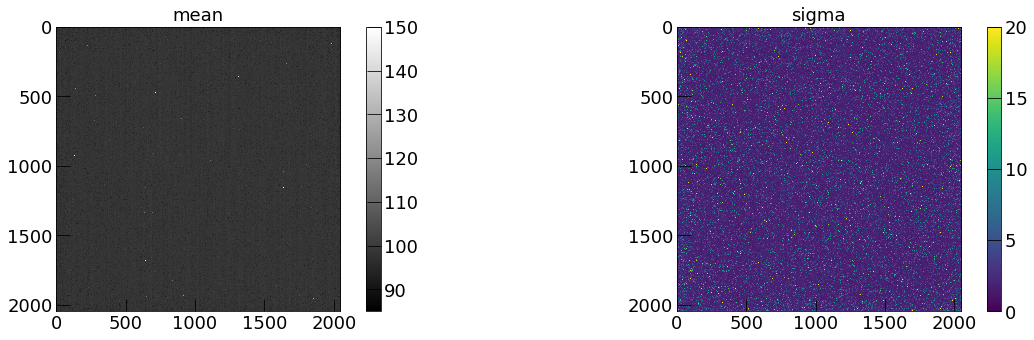

20 139.73652694610777 90.00798403193613
20 100 0.2010917556393996 139.73652694610777 90.00798403193613


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in true_divide


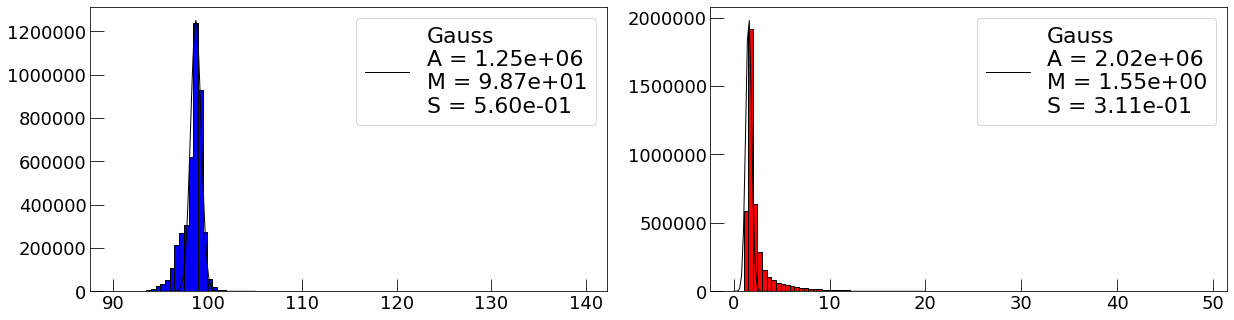

In [58]:
cy.set_atlas_style('long')
run = 2340
try:
    fileoutm = ("./data/run%d_mean.h5" % (run))
    imagem = cy.read_image_h5(fileoutm)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)
try: 
    fileouts = ("./data/run%d_sigma.h5" % (run))
    images = cy.read_image_h5(fileouts)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)


fig, ax = plt.subplots(1,2)
im = ax[0].imshow(imagem, cmap="gray", vmin=85,vmax=150)
fig.colorbar(im, ax=ax[0])
ax[0].set_title("mean")
ax[1].set_title("sigma")
im = ax[1].imshow(images, vmin=0,vmax=20)
fig.colorbar(im, ax=ax[1])
plt.show()
fig, ax = plt.subplots(1,2)
bins=100
y= imagem.ravel()
y=y[(y>90) & (y<140.)]
ax[0].hist(y, bins=bins, fc='b', ec='k')
gauss = True
if gauss:
    cmin    = 95.
    cmax    = 105.
    binsf = int(bins*((cmax-cmin)/(y.max()-y.min())))
    print (binsf, y.max(), y.min())
    print (binsf, bins, (cmax-cmin)/(y.max()-y.min()), y.max(), y.min())
    yh, bins_edge = np.histogram(y, bins=binsf, range=(cmin,cmax))
    sum_yh   = float(sum(yh))
    x       = np.linspace(cmin, cmax, binsf)
    ye      = 1/np.sqrt(yh)
    #ax[0].errorbar(x, yh, ye, fmt="k.")
    A, M, S = yh.max(), y.mean(), y.std()

    popt, pcov = curve_fit(my.Gauss3, x, yh, 
                            sigma=ye,
                            absolute_sigma=True,
                            p0=(A, M, S))
    xf = np.linspace(cmin, cmax, 100)
    ax[0].plot(xf, my.Gauss3(xf, *popt), 'k-', label='Gauss\nA = %.2e\nM = %.2e\nS = %.2e' % 
                          (popt[0], popt[1], popt[2]))
y = images.ravel()
y=y[(y>0) & (y<50)] 
ax[1].hist(y, bins=100, fc='r', ec='k')
if gauss:
    cmin    = 0.
    cmax    = 20.
    binsf = int(bins*((cmax-cmin)/(y.max()-y.min())))
    yh, bins_edge = np.histogram(y, bins=binsf, range=(cmin,cmax))
    sum_yh   = float(sum(yh))
    x       = np.linspace(cmin, cmax, binsf)
    ye      = 1/np.sqrt(yh)
    #ax[0].errorbar(x, yh, ye, fmt="k.")
    A, M, S = yh.max(), y.mean(), y.std()

    popt, pcov = curve_fit(my.Gauss3, x, yh, 
                            sigma=ye,
                            absolute_sigma=True,
                            p0=(A, M, S))
    xf = np.linspace(cmin, cmax, 100)
    ax[1].plot(xf, my.Gauss3(xf, *popt), 'k-', label='Gauss\nA = %.2e\nM = %.2e\nS = %.2e' % 
                          (popt[0], popt[1], popt[2]))
#ax[0].set_yscale("log")
#ax[1].set_yscale("log")
ax[0].legend()
ax[1].legend()
plt.show()